In [1]:
#KNN classifier
import pandas as pd
import numpy as np 
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score

c:\Users\Rachel\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
final_df = pd.read_csv('../../Datasets/merged_df.csv')  
final_df

,Unnamed: 0,Emotions,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,2581,8,Crema\1015_IEO_ANG_HI.wav,-274.081064,90.553742,-1.319409,28.355147,-3.295721,4.588043,-4.467366,...,8.556761e-05,8.468779e-05,8.021102e-05,7.766276e-05,-0.016402,-0.013311,-0.054505,0.011296,0.012550,0.009563
1,6466,12,Crema\1062_IWL_HAP_XX.wav,-282.730691,71.540738,34.301680,11.759998,2.890566,-2.018548,-3.562313,...,9.762038e-04,8.921550e-04,9.161744e-04,8.974863e-04,0.041275,0.032079,0.008832,-0.025359,0.013441,0.032247
2,3673,5,Crema\1028_ITS_NEU_XX.wav,-391.468786,86.299907,44.825176,37.441880,12.426751,7.889423,0.606896,...,4.255911e-05,4.148581e-05,4.309342e-05,4.121599e-05,-0.005835,0.003289,-0.048369,-0.063204,0.011831,0.009074
3,21239,4,Tess\OAF_happy\OAF_kick_happy.wav,-471.930760,63.462643,13.026071,7.454551,7.756898,-2.243907,-15.625067,...,4.372008e-04,5.289125e-04,2.780643e-04,2.327204e-05,-0.005725,0.030310,-0.053869,-0.018939,-0.024129,-0.016006
4,8315,8,Crema\1085_IEO_ANG_LO.wav,-325.833235,65.936750,17.097764,19.950584,-0.243021,13.107857,4.477988,...,1.438745e-04,1.412418e-04,1.453407e-04,1.448913e-04,-0.008370,-0.026442,-0.042298,0.055370,-0.000482,0.018563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23359,17723,8,Crema\1057_ITH_ANG_XX.wav,-290.171100,118.729940,1.143636,30.261385,-10.333275,9.157162,-17.858746,...,1.574077e-10,1.540792e-10,1.520202e-10,1.507096e-10,0.015569,0.010621,0.047189,-0.033713,0.009828,0.003438
23360,13156,8,Crema\1001_ITS_ANG_XX.wav,-326.081400,119.946520,-8.714012,50.327600,-8.826094,16.944773,-24.420095,...,9.699639e-12,9.177862e-12,8.831990e-12,8.610013e-12,-0.022346,0.008833,-0.033925,-0.052598,0.009327,-0.018174
23361,5369,3,Crema\1049_IEO_FEA_HI.wav,-223.742476,51.024043,-4.286261,4.620100,-2.623539,1.466732,-8.066565,...,1.519411e-03,1.569766e-03,1.504463e-03,1.501791e-03,0.031225,-0.047976,0.009784,-0.031447,-0.022062,-0.023104
23362,14031,6,Crema\1012_IEO_SAD_LO.wav,-469.150020,141.522280,23.607246,60.304630,-9.559361,37.592747,-9.963353,...,8.094708e-10,7.813249e-10,7.626765e-10,7.514110e-10,-0.026572,0.005831,-0.087950,-0.076664,0.029938,-0.004121


## SMOTE

In [3]:
final_df_testing = final_df.copy()
X_clean = final_df_testing.drop(columns=['Path', 'Emotions'], axis=1)
y_clean = final_df_testing['Emotions']

# Split 
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Feature scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle imbalance classes with SMOTE for training dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

c:\Users\Rachel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Rachel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

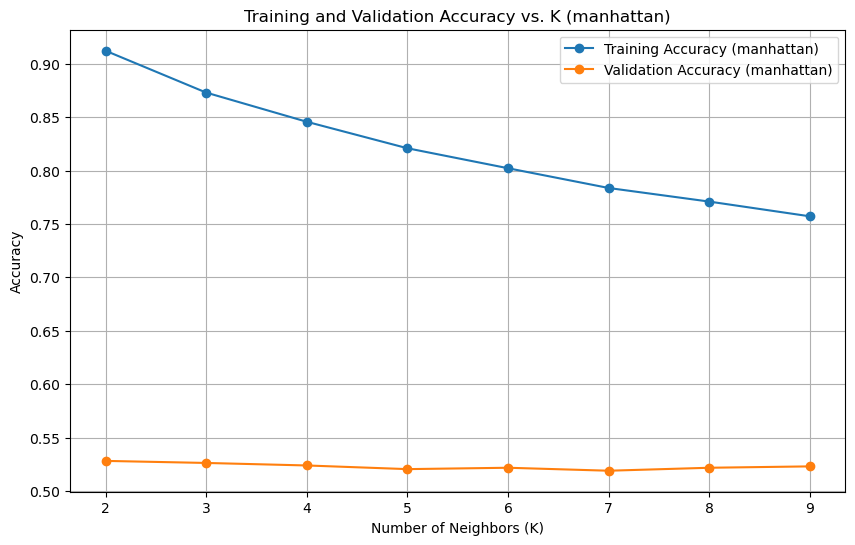

Optimal k for manhattan distance: 2


In [4]:
k_values = range(2, 10)

train_scores_manhattan = []
val_scores_manhattan = []

# Loop through each value of k
for k in k_values:
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    
    # Fit KNN classifier to training data
    knn_manhattan.fit(X_train_resampled, y_train_resampled)
    
    # Calculate training accuracy
    train_score = knn_manhattan.score(X_train_resampled, y_train_resampled)
    train_scores_manhattan.append(train_score)
    
    # Calculate validation accuracy
    val_score = knn_manhattan.score(X_test_scaled, y_test)  
    val_scores_manhattan.append(val_score)

# Plot training and validation accuracy scores for Euclidean distance
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores_manhattan, label='Training Accuracy (manhattan)', marker='o')
plt.plot(k_values, val_scores_manhattan, label='Validation Accuracy (manhattan)', marker='o')
plt.title('Training and Validation Accuracy vs. K (manhattan)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal k value based on the peak validation accuracy for Euclidean distance
best_k_manhattan = k_values[np.argmax(val_scores_manhattan)]
print(f'Optimal k for manhattan distance: {best_k_manhattan}')

In [5]:
# Train KNN model 
classifier_clean = KNeighborsClassifier(n_neighbors=best_k_manhattan, metric='manhattan')
classifier_clean.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_clean = classifier_clean.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy_clean = accuracy_score(y_test, y_pred_clean)
print(f'Accuracy on test set: {accuracy_clean:.4f}')

Accuracy on test set: 0.5281


c:\Users\Rachel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Manhattan produced a higher accuracy on the test set

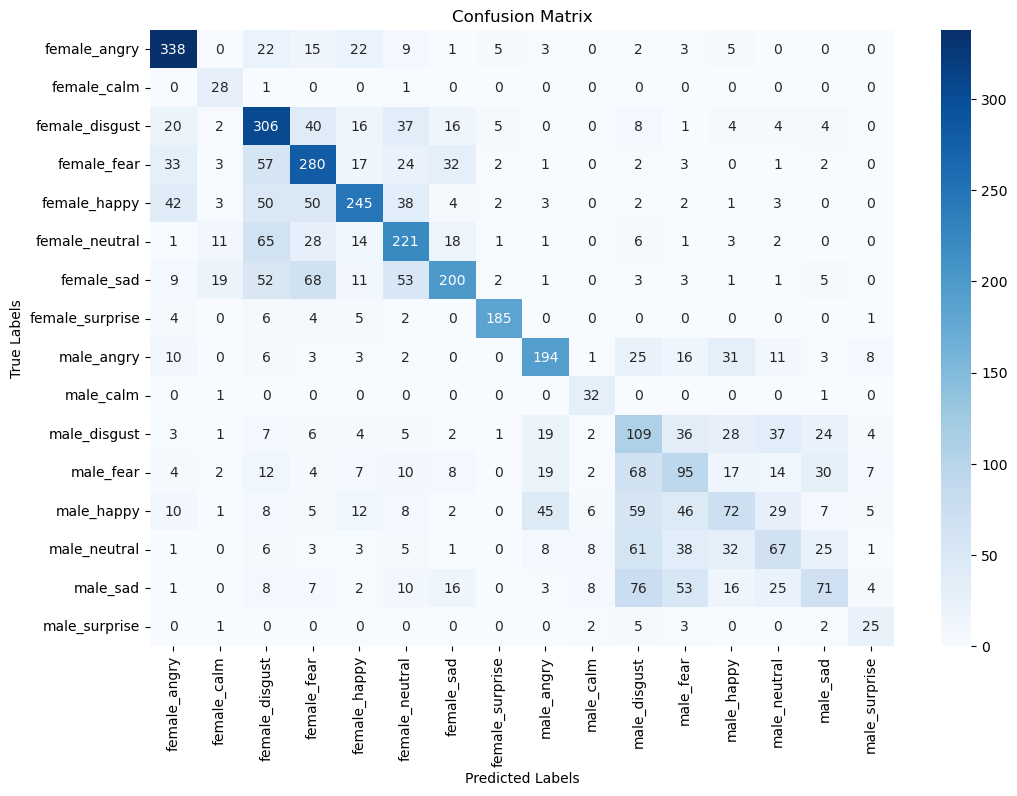

In [6]:
# Calculate confusion matrix
confusion_matrix_clean = confusion_matrix(y_test, y_pred_clean)

class_labels = [
    'female_angry', 'female_calm', 'female_disgust', 'female_fear', 
    'female_happy', 'female_neutral', 'female_sad', 'female_surprise', 
    'male_angry', 'male_calm', 'male_disgust', 'male_fear', 
    'male_happy', 'male_neutral', 'male_sad', 'male_surprise'
]

confusion_df = pd.DataFrame(confusion_matrix_clean, index=class_labels, columns=class_labels)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [7]:
label_map_with_gender = {
    0: 'female_angry',
    1: 'female_calm',
    2: 'female_disgust',
    3: 'female_fear',
    4: 'female_happy',
    5: 'female_neutral',
    6: 'female_sad',
    7: 'female_surprise',
    8: 'male_angry',
    9: 'male_calm',
    10: 'male_disgust',
    11: 'male_fear',
    12: 'male_happy',
    13: 'male_neutral',
    14: 'male_sad',
    15: 'male_surprise'
}

class_labels = [label_map_with_gender[i] for i in range(len(label_map_with_gender))]

print(classification_report(y_test, y_pred_clean, target_names=class_labels))

                 precision    recall  f1-score   support

   female_angry       0.71      0.80      0.75       425
    female_calm       0.39      0.93      0.55        30
 female_disgust       0.50      0.66      0.57       463
    female_fear       0.55      0.61      0.58       457
   female_happy       0.68      0.55      0.61       445
 female_neutral       0.52      0.59      0.55       372
     female_sad       0.67      0.47      0.55       428
female_surprise       0.91      0.89      0.90       207
     male_angry       0.65      0.62      0.64       313
      male_calm       0.52      0.94      0.67        34
   male_disgust       0.26      0.38      0.31       288
      male_fear       0.32      0.32      0.32       299
     male_happy       0.34      0.23      0.27       315
   male_neutral       0.35      0.26      0.30       259
       male_sad       0.41      0.24      0.30       300
  male_surprise       0.45      0.66      0.54        38

       accuracy              